In [32]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig, figure
import seaborn as sns

In [60]:
# read data
divorce_data=pd.read_csv('divorce/divorce.csv',delimiter=";")
data=divorce_data.copy()
married_data=data[data['Class']==0].drop(columns=['Class'])
divorced_data=data[data['Class']==1].drop(columns=['Class'])
# get rank of matrix
print("Rank=",np.linalg.matrix_rank(data))

Rank= 55


In [48]:
# PCA
U,S,VT=np.linalg.svd(data)
# columns of U represent prinicaipal components of data

PCA components can be used in prediction problems. Note that PCA don't have any real world meaning and hence can't be use for explanation

### Explore data

In [49]:
# check for nans
data.isnull()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
# ensure data doesn't have outliers on max value
data.max()

Atr1     4
Atr2     4
Atr3     4
Atr4     4
Atr5     4
Atr6     4
Atr7     4
Atr8     4
Atr9     4
Atr10    4
Atr11    4
Atr12    4
Atr13    4
Atr14    4
Atr15    4
Atr16    4
Atr17    4
Atr18    4
Atr19    4
Atr20    4
Atr21    4
Atr22    4
Atr23    4
Atr24    4
Atr25    4
Atr26    4
Atr27    4
Atr28    4
Atr29    4
Atr30    4
Atr31    4
Atr32    4
Atr33    4
Atr34    4
Atr35    4
Atr36    4
Atr37    4
Atr38    4
Atr39    4
Atr40    4
Atr41    4
Atr42    4
Atr43    4
Atr44    4
Atr45    4
Atr46    4
Atr47    4
Atr48    4
Atr49    4
Atr50    4
Atr51    4
Atr52    4
Atr53    4
Atr54    4
Class    1
dtype: int64

In [42]:
# ensure data doesn't have outliers on min value
data.min()

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

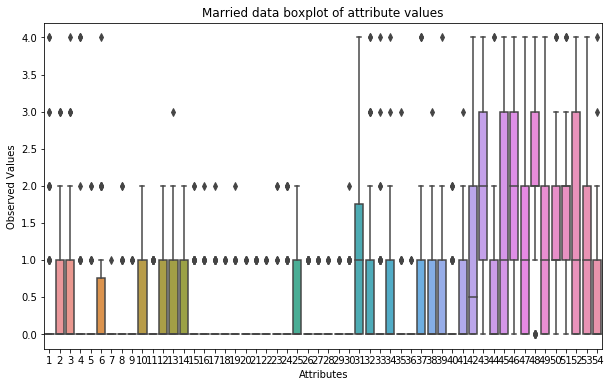

In [61]:
fig = figure(figsize=(10, 6))  # Create the figure space
sns.boxplot(data=married_data).set(title='Married data boxplot of attribute values', ylabel='Observed Values', xlabel='Attributes',
                                 xticklabels=[i for i in range(1,70)])
fig.savefig('married-attributes', bbox_inches='tight')

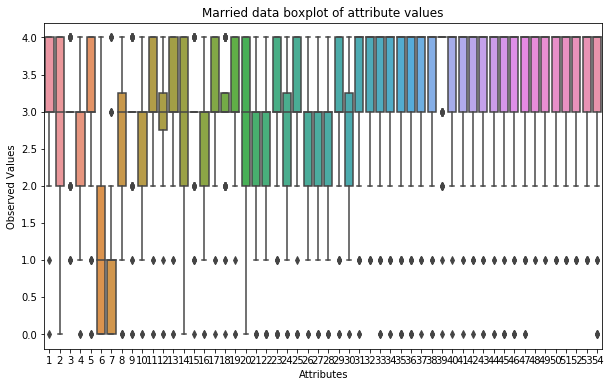

In [62]:
fig = figure(figsize=(10, 6))  # Create the figure space
sns.boxplot(data=divorced_data).set(title='Married data boxplot of attribute values', ylabel='Observed Values', xlabel='Attributes',
                                 xticklabels=[i for i in range(1,70)])
fig.savefig('divorced-attributes', bbox_inches='tight')